In [1]:
from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl

For ./dataset1 :
Found 5 files in CL folder:
Found 5 files in BSE folder:
Found 5 files in seg folder:
Found 4 files in mask folder:
image10_13_1.tif


C:\Users\mlo\AppData\Local\Temp\ipykernel_15448\4179409080.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


image10_15_1.tif
image10_22_1.tif
image10_28_1.tif
image10_59_3.tif
For ./dataset2 :
Found 5 files in CL folder:
Found 5 files in BSE folder:
Found 5 files in seg folder:
image0_0.tif
image0_1.tif
image0_2.tif
image0_3.tif
image0_4.tif
For ./dataset3 :
Found 5 files in CL folder:
Found 5 files in BSE folder:
Found 5 files in seg folder:
Image6_34.tif
Image6_35.tif
Image6_36.tif
Image6_37.tif
Image6_38.tif
For ./dataset4 :
Found 5 files in CL folder:
Found 5 files in BSE folder:
Found 5 files in seg folder:
Image10_10.tif
Image10_11.tif
Image10_12.tif
Image10_13.tif
Image10_14.tif


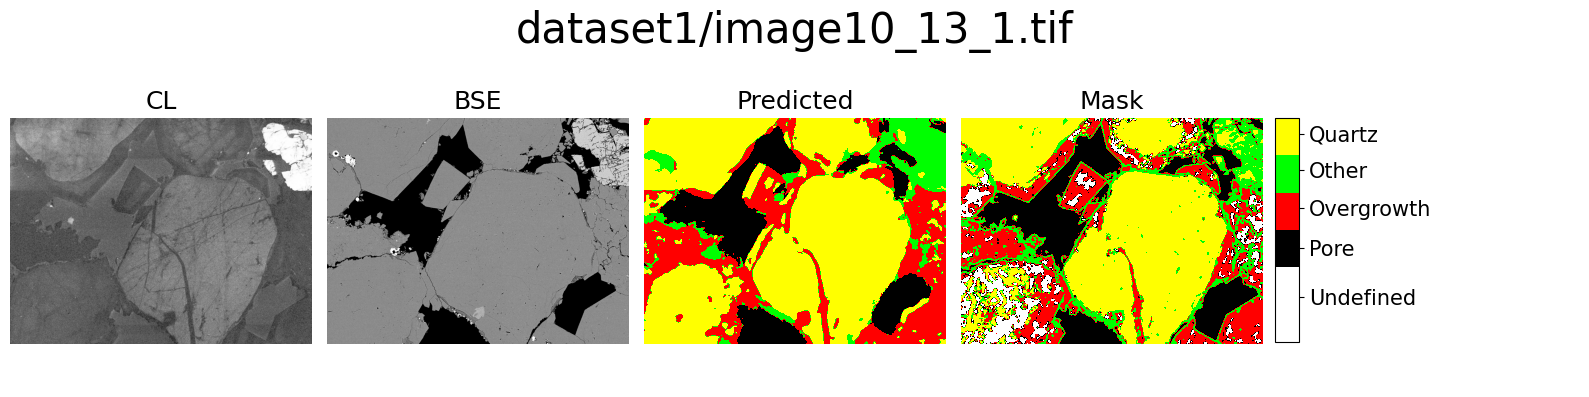

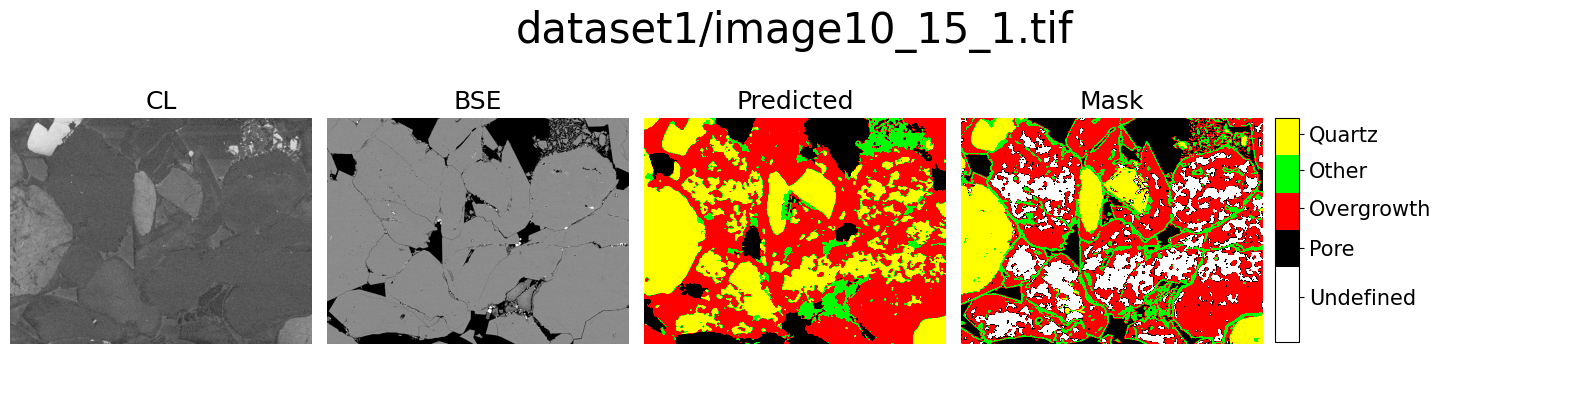

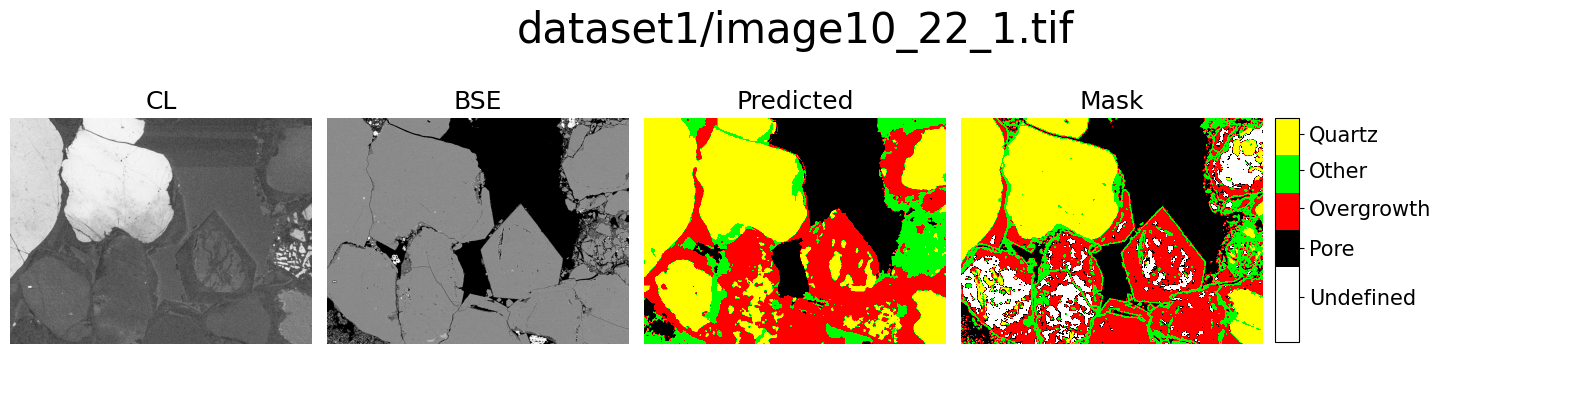

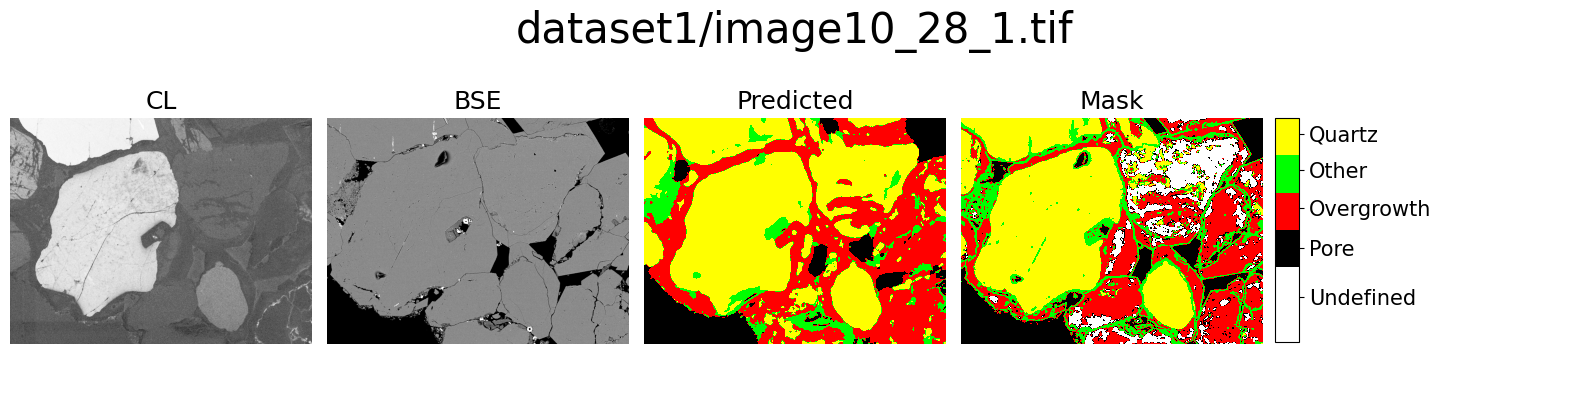

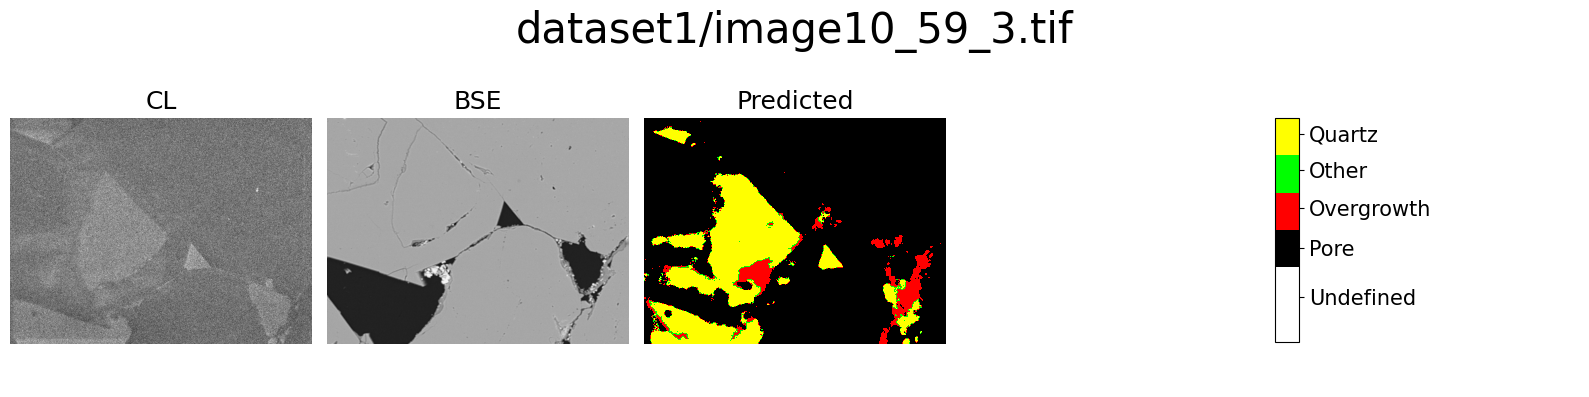

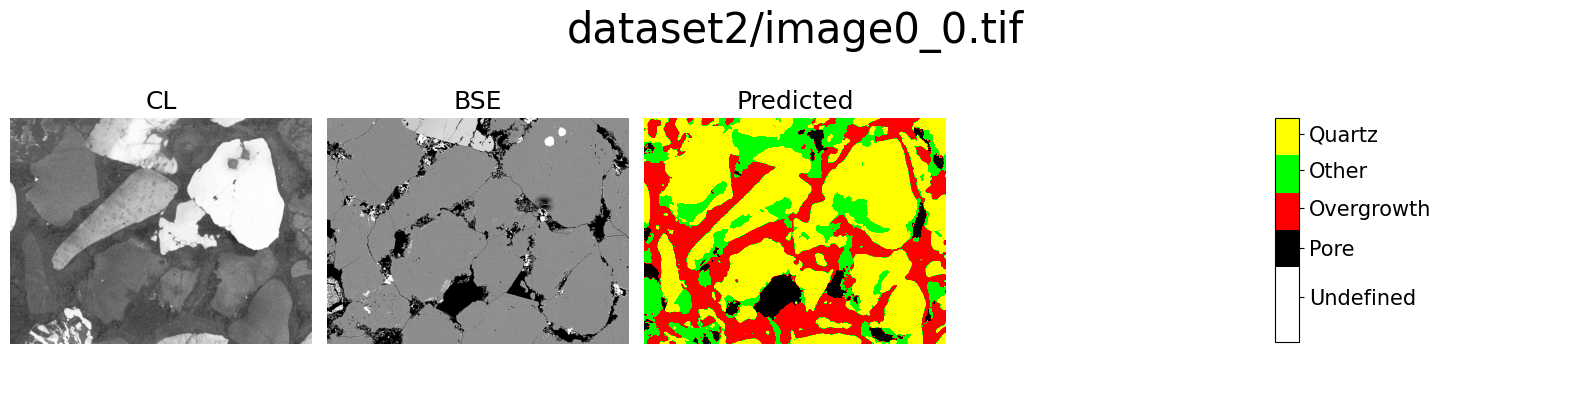

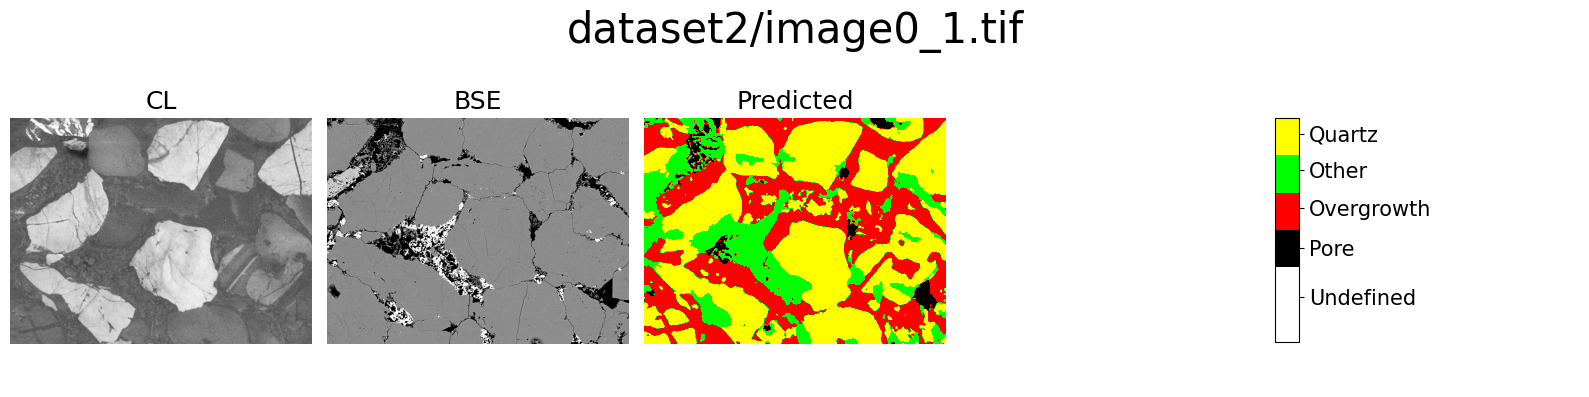

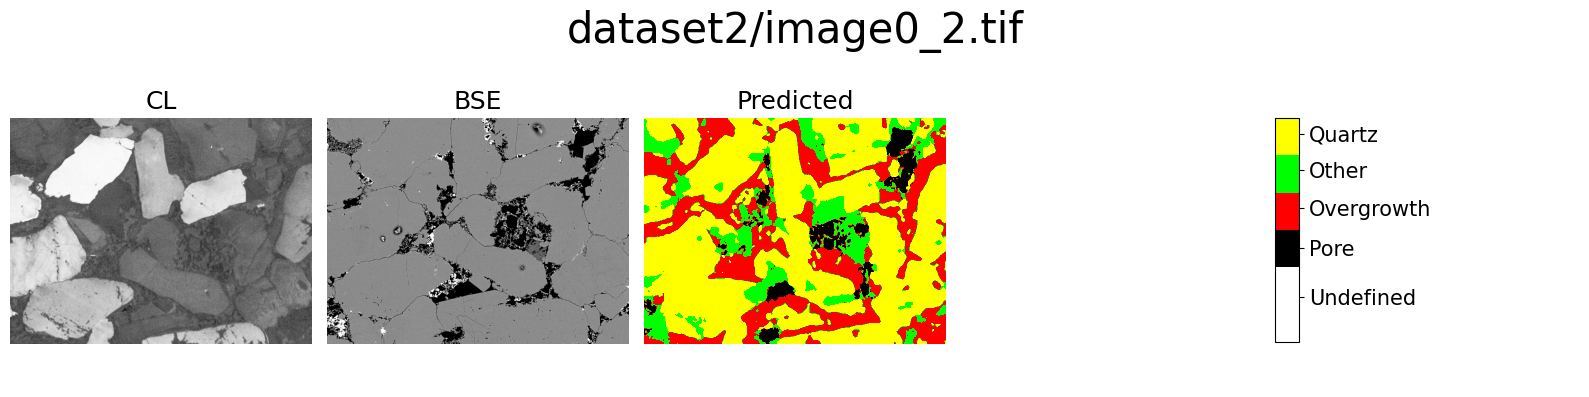

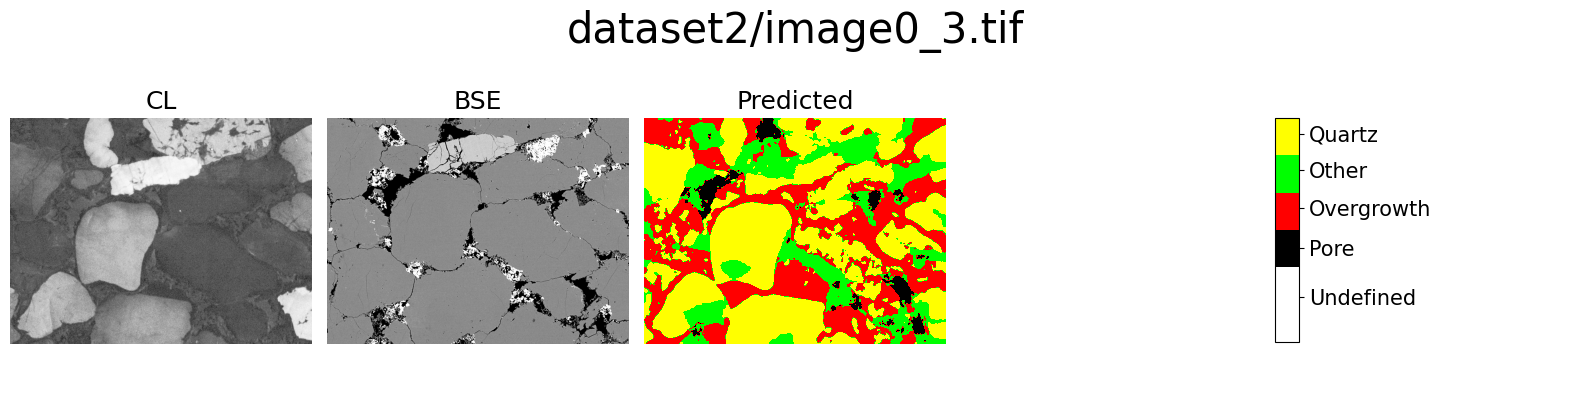

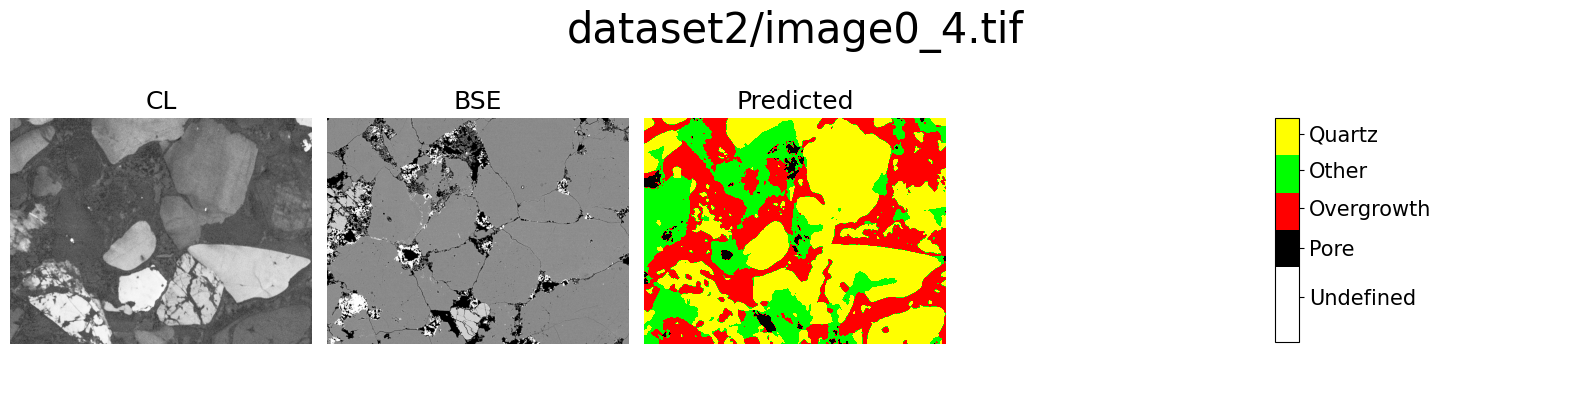

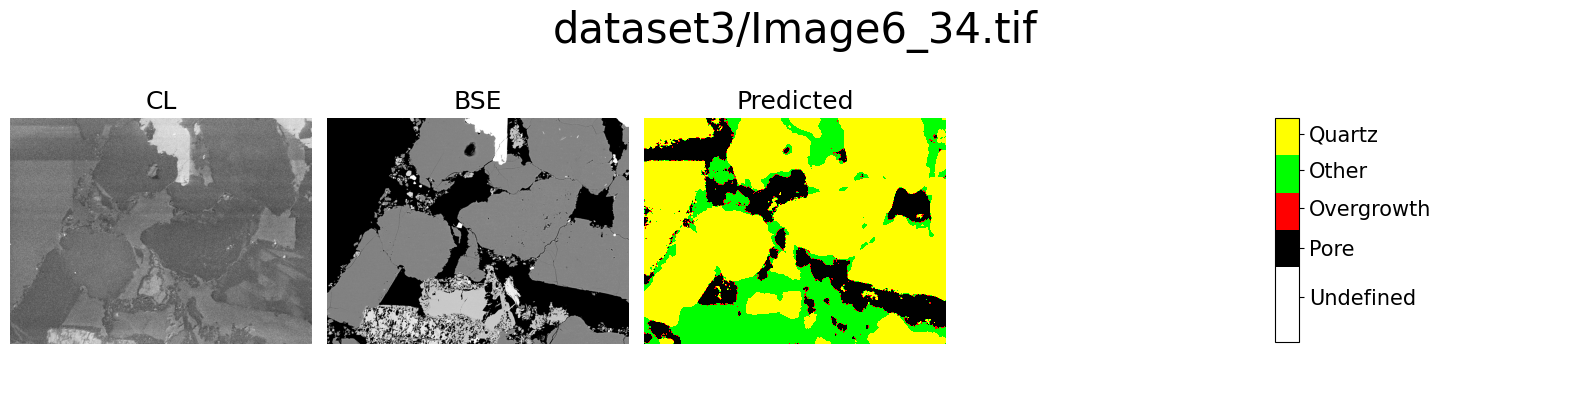

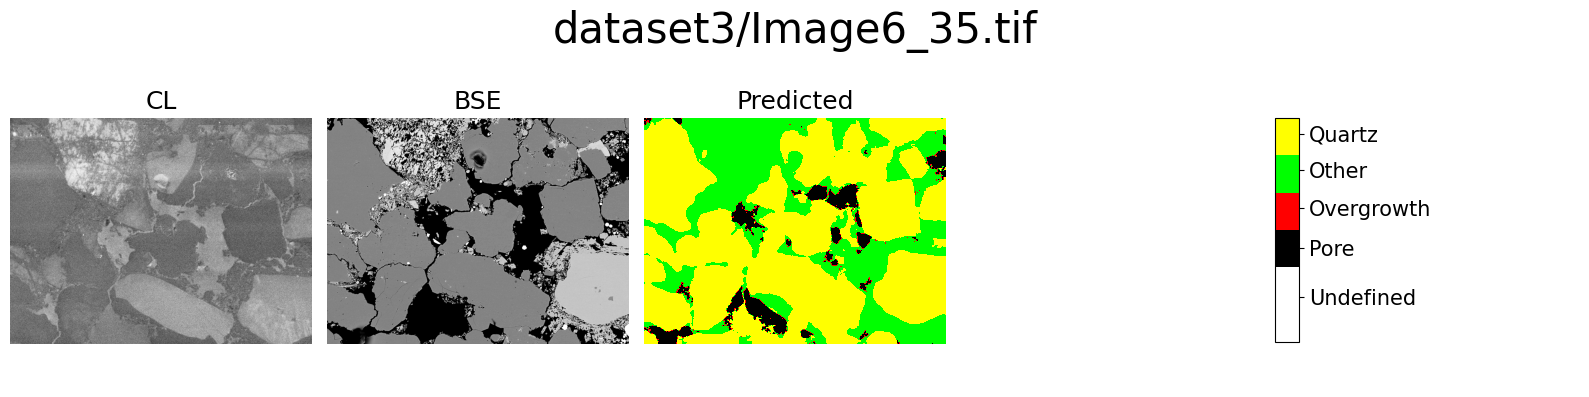

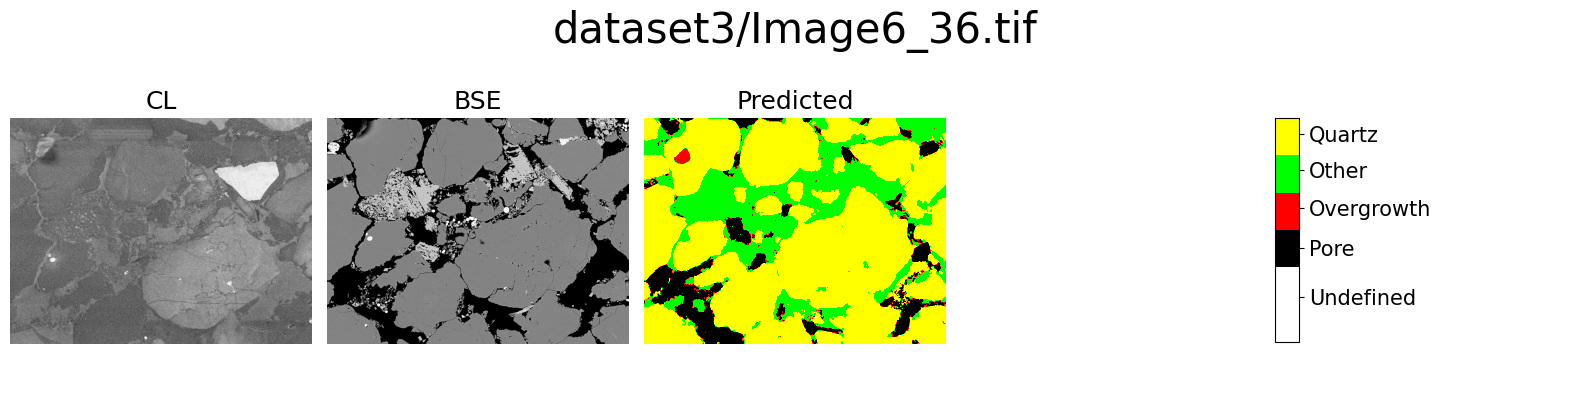

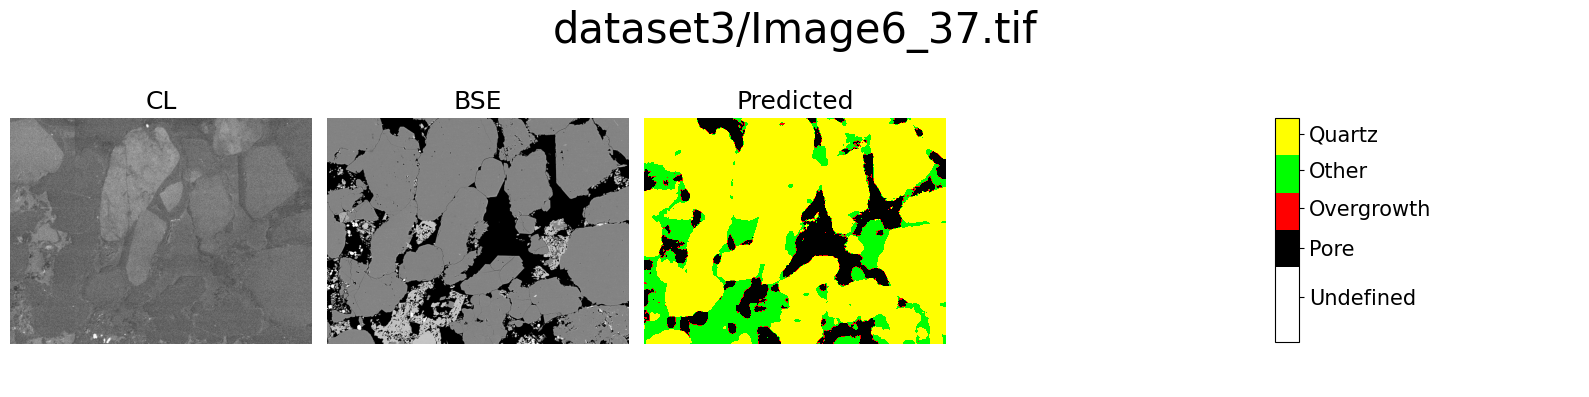

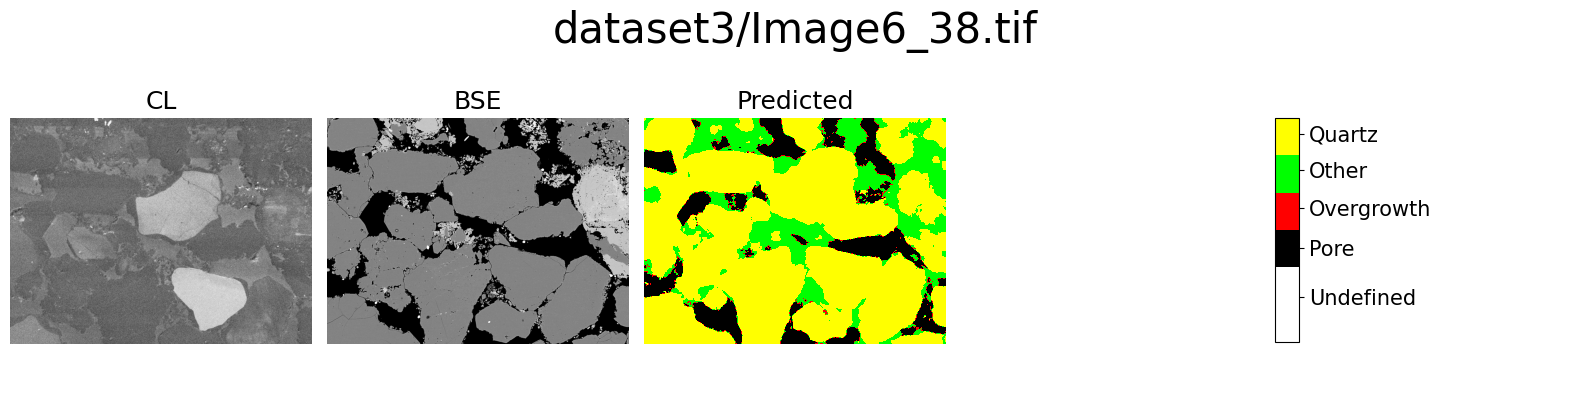

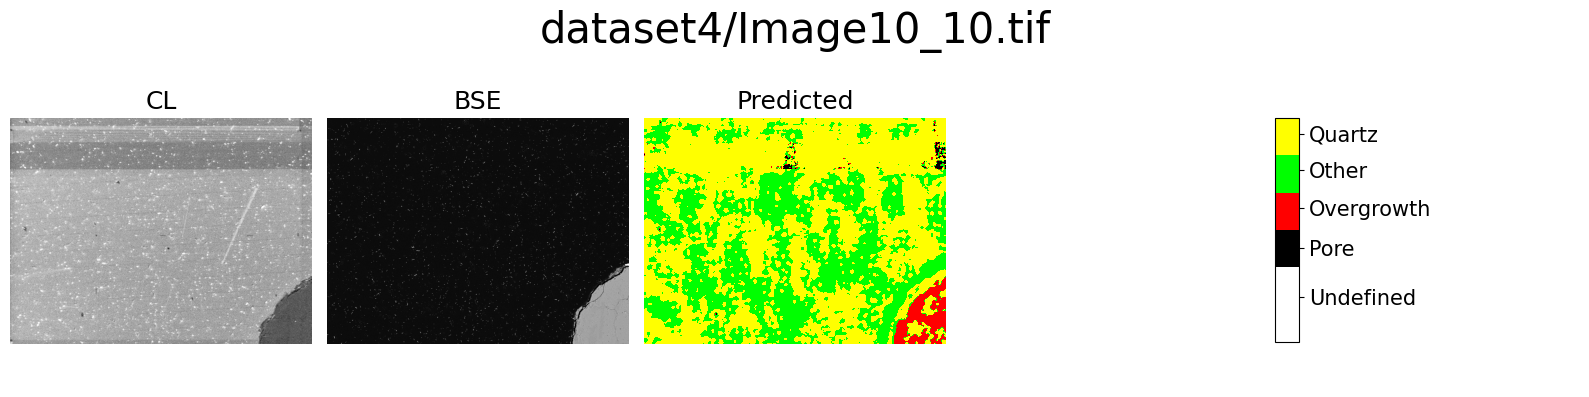

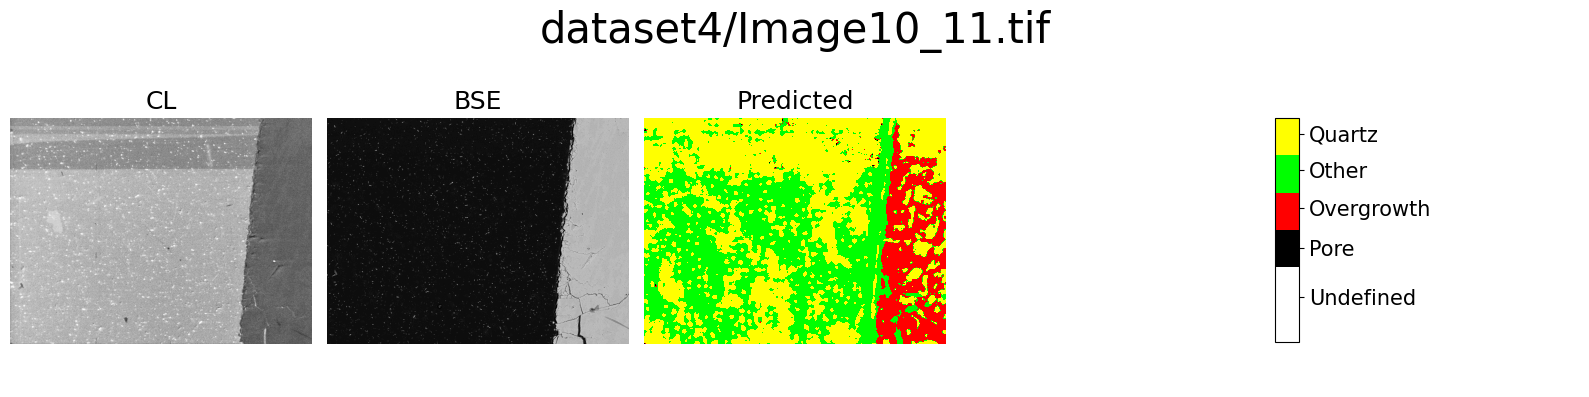

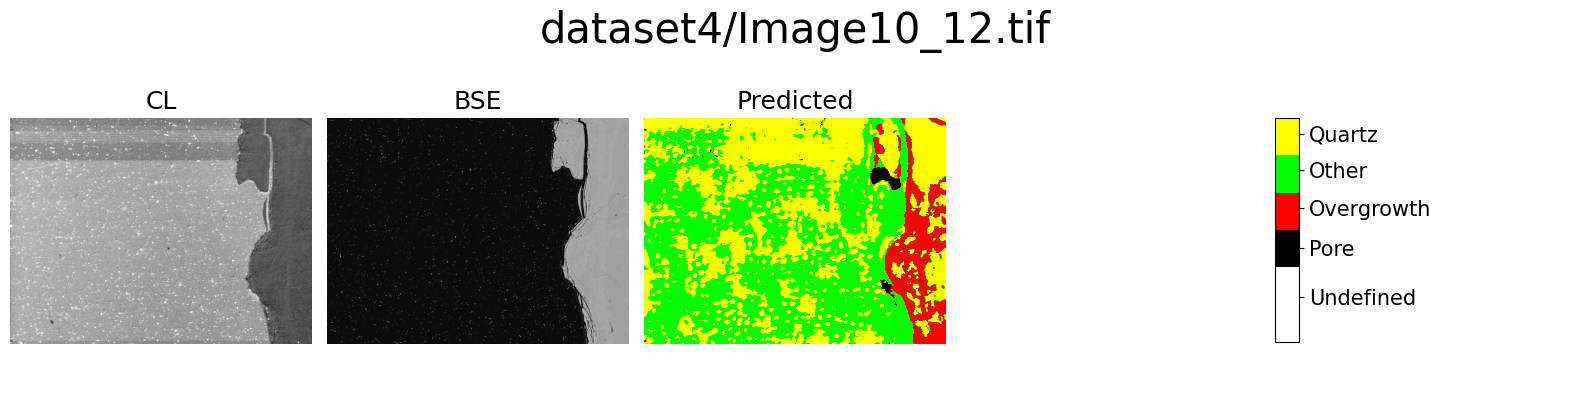

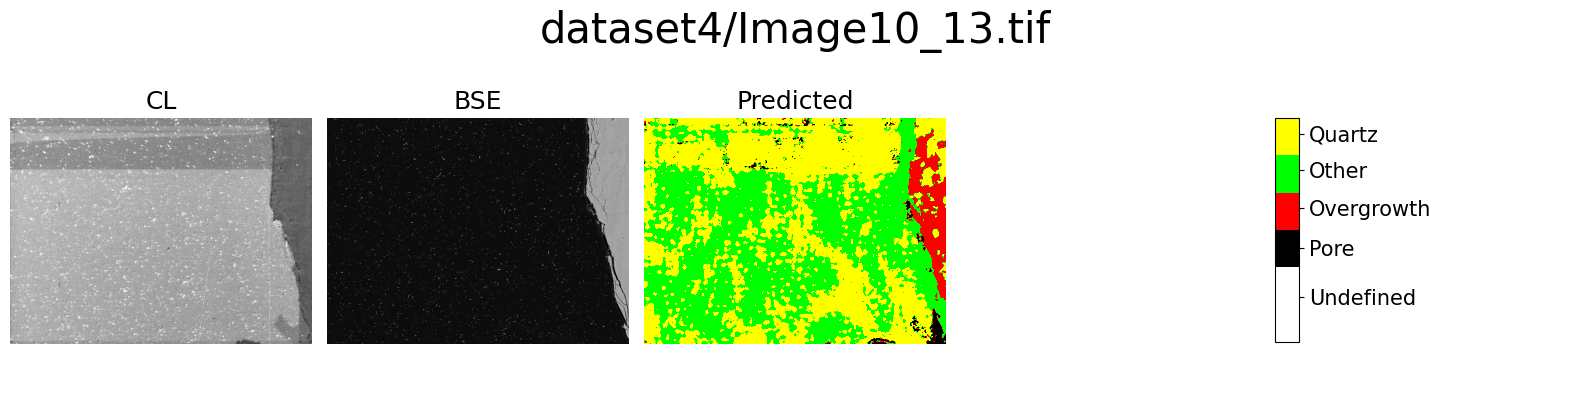

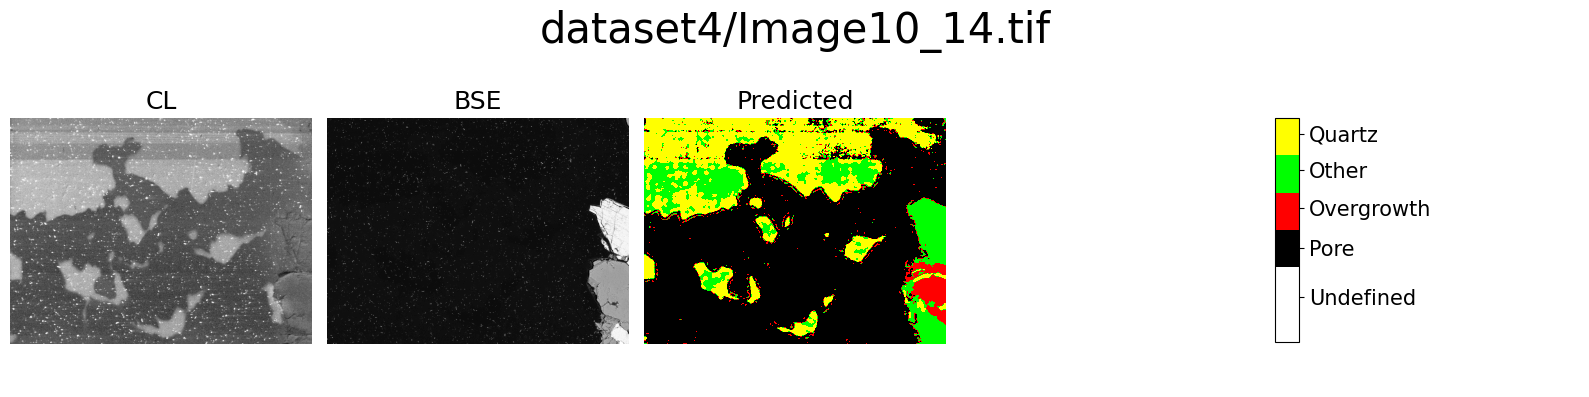

In [9]:
folder_list = ['./dataset1','./dataset2','./dataset3', './dataset4']

dataset1 = {}
dataset2 = {}
dataset3 = {}
dataset4 = {}

dataset_list = [dataset1, dataset2, dataset3, dataset4]

cmap_mask =(mpl.colors.ListedColormap(['white','white','#000000', '#ff0000', '#00ff00', '#ffff00']))
cmap_pred =(mpl.colors.ListedColormap(['#000000', '#ff0000', '#00ff00', '#ffff00']))


fontsize_title = 18
fontsize_suptitle = 30

k = 0
for folder in folder_list:
    print('For', folder, ':')
    path_folder_cl = folder + '/CL/'
    path_folder_bse = folder + '/BSE/'
    path_folder_seg = folder + '/CL_segmented/'
    path_folder_mask = folder + '/clean_mask/'

    onlyfiles_cl = [f for f in listdir(path_folder_cl) if isfile(join(path_folder_cl, f))]
    onlyfiles_bse = [f for f in listdir( path_folder_bse) if isfile(join(path_folder_bse, f))]
    onlyfiles_seg = [f for f in listdir(path_folder_seg) if isfile(join(path_folder_seg, f))]
    print('Found' , len(onlyfiles_cl), 'files in CL folder:')
    print('Found' , len(onlyfiles_bse), 'files in BSE folder:')
    print('Found' , len(onlyfiles_seg), 'files in seg folder:')

    if os.path.exists(path_folder_mask):
        onlyfiles_mask = [f for f in listdir(path_folder_mask) if isfile(join(path_folder_mask, f))]
        print('Found' , len(onlyfiles_mask), 'files in mask folder:')
        check2 = True



    for i in range(len(onlyfiles_cl)):
        check1 = os.path.isfile(path_folder_cl + onlyfiles_cl[i])
        
        im_name = onlyfiles_cl[i]
        print(im_name)

        dataset_list[k]['CL_'+im_name] =  cv2.imread(path_folder_cl  + im_name , 0)
        dataset_list[k]['BSE_'+im_name] = cv2.imread(path_folder_bse + im_name , 0)
        dataset_list[k]['seg_'+im_name] = cv2.imread(path_folder_seg + im_name , 0)

        f, ax = plt.subplots(1,5, figsize = (16,4))
        ax[0].imshow(dataset_list[k]['CL_'  + im_name], cmap = 'Greys_r')
        ax[0].set_title('CL', fontsize = fontsize_title)
        ax[0].set_axis_off()
        ax[1].imshow(dataset_list[k]['BSE_' + im_name], cmap = 'Greys_r')
        ax[1].set_title('BSE', fontsize = fontsize_title)
        ax[1].set_axis_off()
        ax[2].imshow(dataset_list[k]['seg_' + im_name], cmap= cmap_pred)
        ax[2].set_title('Predicted', fontsize = fontsize_title)
        ax[2].set_axis_off()

        cax = f.add_axes([0.8, 0.15, 0.015, 0.56])
        cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap_mask, 
                                        orientation='vertical', ticks=[.2, .42, .6,.77,.93])

        #plt.colorbar(im3, cax=cax, ticks=[0, 1, 2,2.7,3.5])
        cbar.ax.set_yticklabels(['Undefined','Pore','Overgrowth','Other', 'Quartz'], fontsize = 15)

 
        plt.suptitle(folder.replace('./' , '') + '/' + im_name, fontsize = fontsize_suptitle)



        if isfile(path_folder_mask + onlyfiles_cl[i]) == True:
            dataset_list[k]['mask_'+im_name] = cv2.imread(path_folder_mask + im_name , 0)
            ax[3].imshow(dataset_list[k]['mask_'+im_name], cmap = cmap_mask, vmin= -1, vmax=4 )
            ax[3].set_title('Mask', fontsize = fontsize_title)
            ax[3].set_axis_off()
        else:
            ax[3].set_axis_off()
        
        ax[4].set_axis_off()
        plt.tight_layout()

  

        plt.savefig('results_'+ im_name.replace('.tif','.png'), format = 'png')
    k =+ 1 



In [3]:
pwd

'c:\\Users\\mlo\\Desktop\\submission_review'

In [4]:
dataset1['seg_image10_13_1.tif']

array([[226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       ...,
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226]], dtype=uint8)